# HR diagram for Gaia

In [1]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from matplotlib import pylab, cm
from numpy import arange,array,ones
from scipy import stats

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

# HR Diagram for Hipparcos

In [3]:
job = Gaia.launch_job_async("SELECT * \
FROM public.hipparcos_newreduction \
WHERE CONTAINS(POINT('ICRS',public.hipparcos_newreduction.ra,public.hipparcos_newreduction.dec),CIRCLE('ICRS',67.07,15.76,5))=1;" \
, dump_to_file=True)

print (job)

Jobid: 1526848401018O
Phase: COMPLETED
Owner: None
Output file: async_20180520163321.vot
Results: None


In [4]:
r = job.get_results()
print (r['pm_ra'])

 pm_ra  
'mas/yr'
--------
  127.76
  123.87
   -2.73
   15.35
   -1.48
    -3.3
    37.3
    26.6
  416.16
  -14.78
     ...
    -4.2
   12.41
  -17.97
   86.93
   10.77
    98.1
    5.95
   14.83
   23.88
    5.76
Length = 238 rows


In [5]:
# Function for computing the absolute magnitude
def abs_mag(parallax,apparent_mag):
    return apparent_mag+5*np.log10(np.abs(parallax))-10

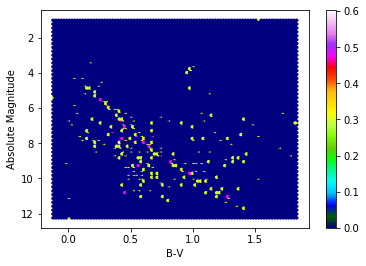

In [6]:
b_v= r['b_v'] #r['b_v',:99]
abs_mag = r['hp_mag']

# Plot the 
plt.hexbin(b_v, abs_mag, gridsize = 90,cmap=cm.gist_ncar, bins='log')
plt.xlabel('B-V')
plt.ylabel('Absolute Magnitude')
#plt.scatter(hip_bv,abs_mag_gaia, c=heatmap , s=10, cmap=cm.hot , lw=0)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

# HR Diagram for Gaia 

In [7]:
job1 = Gaia.launch_job_async("SELECT * \
FROM gaiadr1.tgas_source \
WHERE CONTAINS(POINT('ICRS',gaiadr1.tgas_source.ra,gaiadr1.tgas_source.dec),CIRCLE('ICRS',67.07,15.76,2.01))=1;" \
, dump_to_file=True)

print (job1)

Jobid: 1526848402823O
Phase: COMPLETED
Owner: None
Output file: async_20180520163322.vot
Results: None


In [8]:
rG = job1.get_results()

In [9]:
gaiaplx = rG['parallax']
ap_gmag = rG['phot_g_mean_mag']

In [10]:
am = 5*np.log10(np.abs(rG['parallax']))

In [11]:
am2 = am + rG['phot_g_mean_mag'] - 10.0

abs_mag_gaia = abs_mag(rG['parallax'],rG['phot_g_mean_mag'])

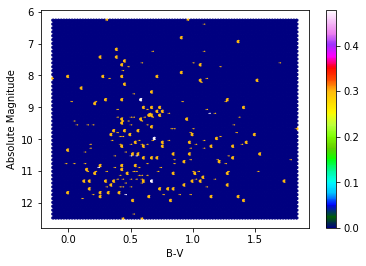

In [12]:
plt.hexbin (b_v, rG['phot_g_mean_mag'], gridsize = 90,cmap=cm.gist_ncar, bins='log')
plt.xlabel('B-V')
plt.ylabel('Absolute Magnitude')
#plt.scatter(hip_bv,abs_mag_gaia, c=heatmap , s=10, cmap=cm.hot , lw=0)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

# TGAS Proper Motion for Hyades

In [48]:
job3 = Gaia.launch_job_async("SELECT TOP 50* \
FROM gaiadr1.tgas_source \
WHERE CONTAINS(POINT('ICRS',gaiadr1.tgas_source.ra,gaiadr1.tgas_source.dec),CIRCLE('ICRS',67.07,15.76,3))=1;" \
, dump_to_file=True)

print (job3)

Jobid: 1526848883945O
Phase: COMPLETED
Owner: None
Output file: async_20180520164124.vot
Results: None


In [49]:
r3 = job3.get_results()
#print (r3['phot_g_mean_mag'])

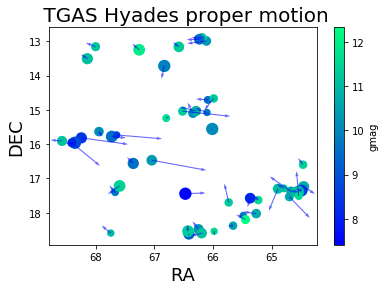

In [15]:
gmag = r3['phot_g_mean_mag']
ra = r3['ra']
dec = r3['dec']
pm_ra = r3['pmra']
pm_dec = r3['pmdec']
area = np.linspace(np.min(gmag), np.max(gmag), 10)

val = plt.scatter(ra,dec, c=gmag,s=area**2, marker='o', cmap=cm.winter, lw=0)
plt.title(' TGAS Hyades proper motion', fontsize = 20)
plt.xlabel('RA', fontsize = 18)
plt.ylabel('DEC', fontsize = 18)
cbar = plt.colorbar(val)
cbar.ax.set_ylabel('gmag')
pm_ra = pm_ra - np.mean(pm_ra)
pm_dec = pm_dec - np.mean(pm_dec)
plt.quiver(ra,dec,pm_ra,pm_dec,width=0.004,alpha=0.6,color='Blue')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.savefig('Hyades2.png', dpi=300, bbox_inches='tight')
plt.show()

In [52]:
pm = (r3['pmra']**2 + r3['pmdec']**2)**0.5

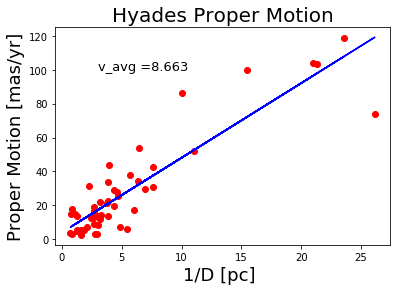

In [53]:
#val = plt.scatter(r3['parallax'],pm, c='pink',s=area**1.2, marker='*', cmap=cm.winter, lw=0)
plt.title('Hyades Proper Motion', fontsize = 20)
plt.xlabel('1/D [pc] ', fontsize = 18)
plt.ylabel('Proper Motion [mas/yr]',fontsize = 18 )
slope, intercept, r_value, p_value, std_err = stats.linregress(r3['parallax'],pm)
line = slope*r3['parallax']+intercept
plt.plot(r3['parallax'],pm,'ro',r3['parallax'], line,'b')
plt.text(3, 100, r'v_avg =8.663',fontsize = 13)
ax = plt.gca()
plt.savefig('Hyades1.png', dpi=300, bbox_inches='tight')

In [54]:
slope

4.409214677718513

# TGAS Proper Motion For Pleiades

In [40]:
test = Gaia.launch_job_async("SELECT TOP 50* \
FROM gaiadr1.tgas_source \
WHERE CONTAINS(POINT('ICRS',gaiadr1.tgas_source.ra,gaiadr1.tgas_source.dec),CIRCLE('ICRS',56.75,24.12,5))=1;" \
, dump_to_file=True)

print (test)

Jobid: 1526848840787O
Phase: COMPLETED
Owner: None
Output file: async_20180520164040.vot
Results: None


In [41]:
k = test.get_results()

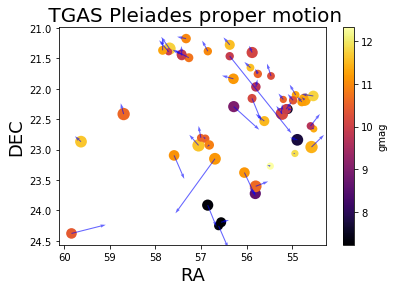

In [20]:
gmag = k['phot_g_mean_mag']
ra = k['ra']
dec = k['dec']
pm_ra = k['pmra']
pm_dec = k['pmdec']
area = np.linspace(np.min(gmag), np.max(gmag), 10)

val = plt.scatter(ra,dec, c=gmag,s=area**2, marker='o', cmap=cm.inferno, lw=0)
plt.title(' TGAS Pleiades proper motion',fontsize = 20)
plt.xlabel('RA',fontsize = 18)
plt.ylabel('DEC',fontsize = 18)
cbar = plt.colorbar(val)
cbar.ax.set_ylabel('gmag')
pm_ra = pm_ra - np.mean(pm_ra)
pm_dec = pm_dec - np.mean(pm_dec)
plt.quiver(ra,dec,pm_ra,pm_dec,width=0.004,alpha=0.6,color='Blue')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.savefig('Pleiades1.png', dpi=300, bbox_inches='tight')
plt.show()

In [42]:
p_m = (k['pmra']**2 + k['pmdec']**2)**0.5

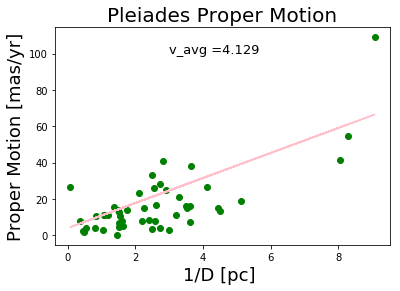

In [56]:
plt.title('Pleiades Proper Motion', fontsize = 20)
plt.xlabel('1/D [pc] ', fontsize = 18)
plt.ylabel('Proper Motion [mas/yr]',fontsize = 18 )
slope_, intercept_, r_value_, p_value_, std_err_ = stats.linregress(k['parallax'],p_m)
line_ = slope_*k['parallax']+intercept
plt.plot(k['parallax'],p_m,'go',k['parallax'], line_,'pink')
plt.text(3, 100, r'v_avg =4.129',fontsize = 13)
ax = plt.gca()
plt.savefig('Pleiades2.png', dpi=300, bbox_inches='tight')

# Hipparcos Proper Motion for Hyades

In [23]:
job2 = Gaia.launch_job_async("SELECT TOP 50* \
FROM public.hipparcos_newreduction \
WHERE CONTAINS(POINT('ICRS',public.hipparcos_newreduction.ra,public.hipparcos_newreduction.dec),CIRCLE('ICRS',67.07,15.76,5))=1;" \
, dump_to_file=True)

print (job2)


Jobid: 1526848411246O
Phase: COMPLETED
Owner: None
Output file: async_20180520163331.vot
Results: None


In [24]:
r2 = job2.get_results()
#print (r2)

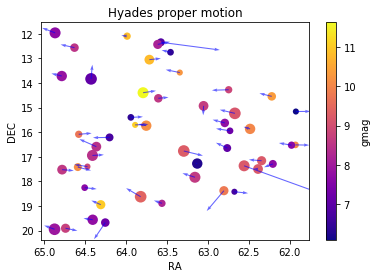

In [25]:
Gmag = r2['hp_mag']
Ra = r2['ra']
Dec = r2['dec']
Pm_ra = r2['pm_ra']
Pm_dec = r2['pm_de']
area = np.linspace(np.min(Gmag), np.max(Gmag), 10)

val = plt.scatter(Ra,Dec, c=Gmag,s=area**2, marker='o', cmap=cm.plasma, lw=0)
plt.title('Hyades proper motion')
plt.xlabel('RA')
plt.ylabel('DEC')
cbar = plt.colorbar(val)
cbar.ax.set_ylabel('gmag')
Pm_ra = Pm_ra - np.mean(Pm_ra)
Pm_dec = Pm_dec - np.mean(Pm_dec)
plt.quiver(Ra,Dec,Pm_ra,Pm_dec,width=0.004,alpha=0.6,color='Blue')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()